# Logistic Regression

This notebook uses keras to implement a logistic regression model.

**Note:** to run this notebook and the exercises you will need to install Keras and Tensorflow with `pip install tensorflow keras`.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

from sklearn.datasets import make_classification

import numpy as np

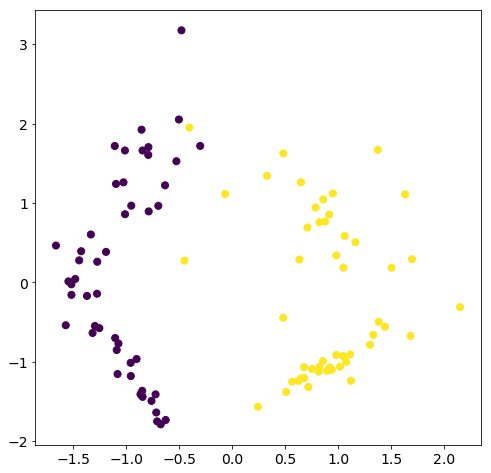

In [2]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=2, random_state=1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=50)

In [3]:
def one_hot(n_classes, y):
    return np.eye(n_classes)[y]

Y_ = one_hot(2, y)

In [4]:
Y_.shape

(100, 2)

In [5]:
Y_[:5]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [6]:
import keras

Using TensorFlow backend.


In [7]:
from keras.layers import Input, Dense, Activation
from keras.models import Model

np.random.seed(123)

# This returns a tensor to represent the input
inputs = Input(shape=(2,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(2)(inputs)
predictions = Activation('softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              )
model.fit(X, Y_, epochs=100, verbose=False)

In [8]:
model.predict(np.array([[1,.9], [1,-.9]]))

array([[0.1982841 , 0.80171585],
       [0.12973237, 0.8702676 ]], dtype=float32)

In [9]:
from utils import plot_surface

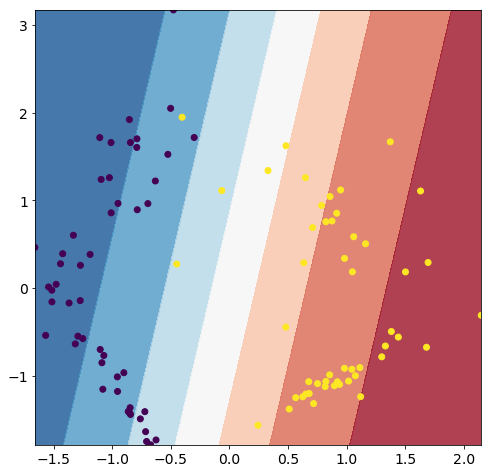

In [10]:
plot_surface(model, X, y)